In [11]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time
from tqdm.notebook import tqdm_notebook

from ipywidgets import FloatSlider, interact

%matplotlib notebook

In [2]:
def bound(x):
    z = x
    for i in range(3):
        z = np.abs(z)
#         inds  = np.where(z > 1)[0]
#         for i in range(len(z)):
#             z[i] = 1 - (z[i] - 1)
    return z

def f(z,  r=3.99):
    return np.abs(r * z * (1 - z))

def g(y, z, r=3.99, beta=0.2):
    return bound(r * y *(1 - y - beta * z))

(1000, 20)


<IPython.core.display.Javascript object>


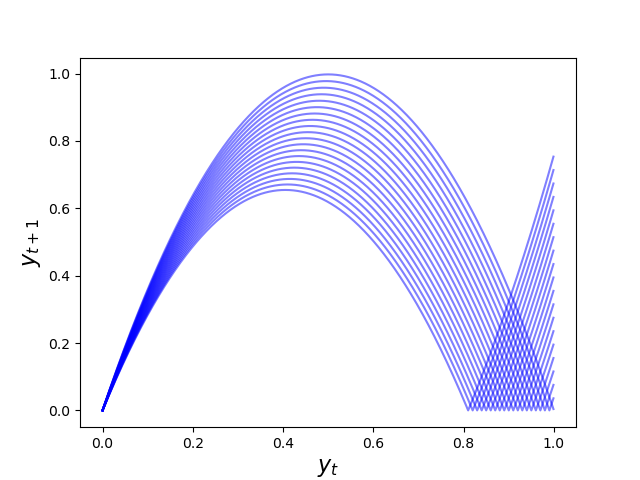

In [12]:
y = np.arange(0, 1, 0.001)
zs = np.arange(0, 1, 0.05)

y_tp = np.array([g(y, z) for z in zs]).T
y_tpp = np.array([g(g(y, z), f(z)) for z in zs]).T


print(y_tpp.shape)

plt.figure()
ax0 = plt.subplot(111)
_ = [ax0.plot(y, y_tp[:, i], 'b', alpha=0.5) for i in range(y_tp.shape[1])]
ax0.set_xlabel("$y_t$", fontsize=16)
ax0.set_ylabel("$y_{t+1}$", fontsize=16)

plt.savefig('ssr2.pdf')

<IPython.core.display.Javascript object>


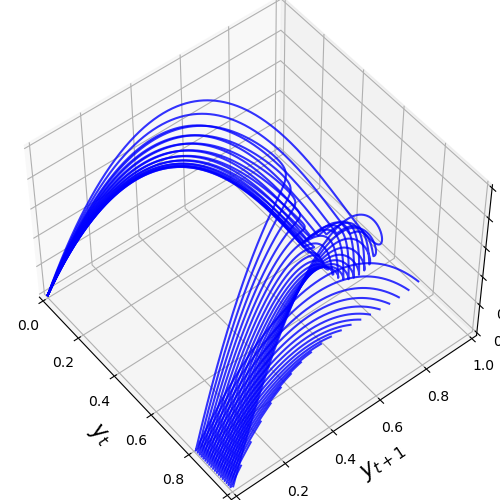

  0%|          | 0/360 [00:00<?, ?it/s]

In [13]:
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111, projection='3d')
_ = [ax1.plot(y, y_tp[:, i], y_tpp[:, i], 'b', alpha=0.8) for i in range(y_tp.shape[1])]

ax1.set_xlabel("$y_t$", fontsize=16)
ax1.set_ylabel("$y_{t+1}$", fontsize=16)
ax1.set_zlabel("$y_{t+2}$", fontsize=16)
ax1.set_xlim([0, 1])
ax1.set_ylim([0, 1])
ax1.set_zlim([0, 1])


plt.tight_layout(h_pad=0, w_pad=0, pad=0)
ax1.dist=12
ax1.view_init(elev=42., azim=-89)
plt.savefig('ssr.pdf')


azims = np.arange(0, 720, 2)
for azim in tqdm_notebook(azims):
    ax1.view_init(elev=20., azim=azim)
    fig.canvas.draw()
    time.sleep(0.001)

<IPython.core.display.Javascript object>


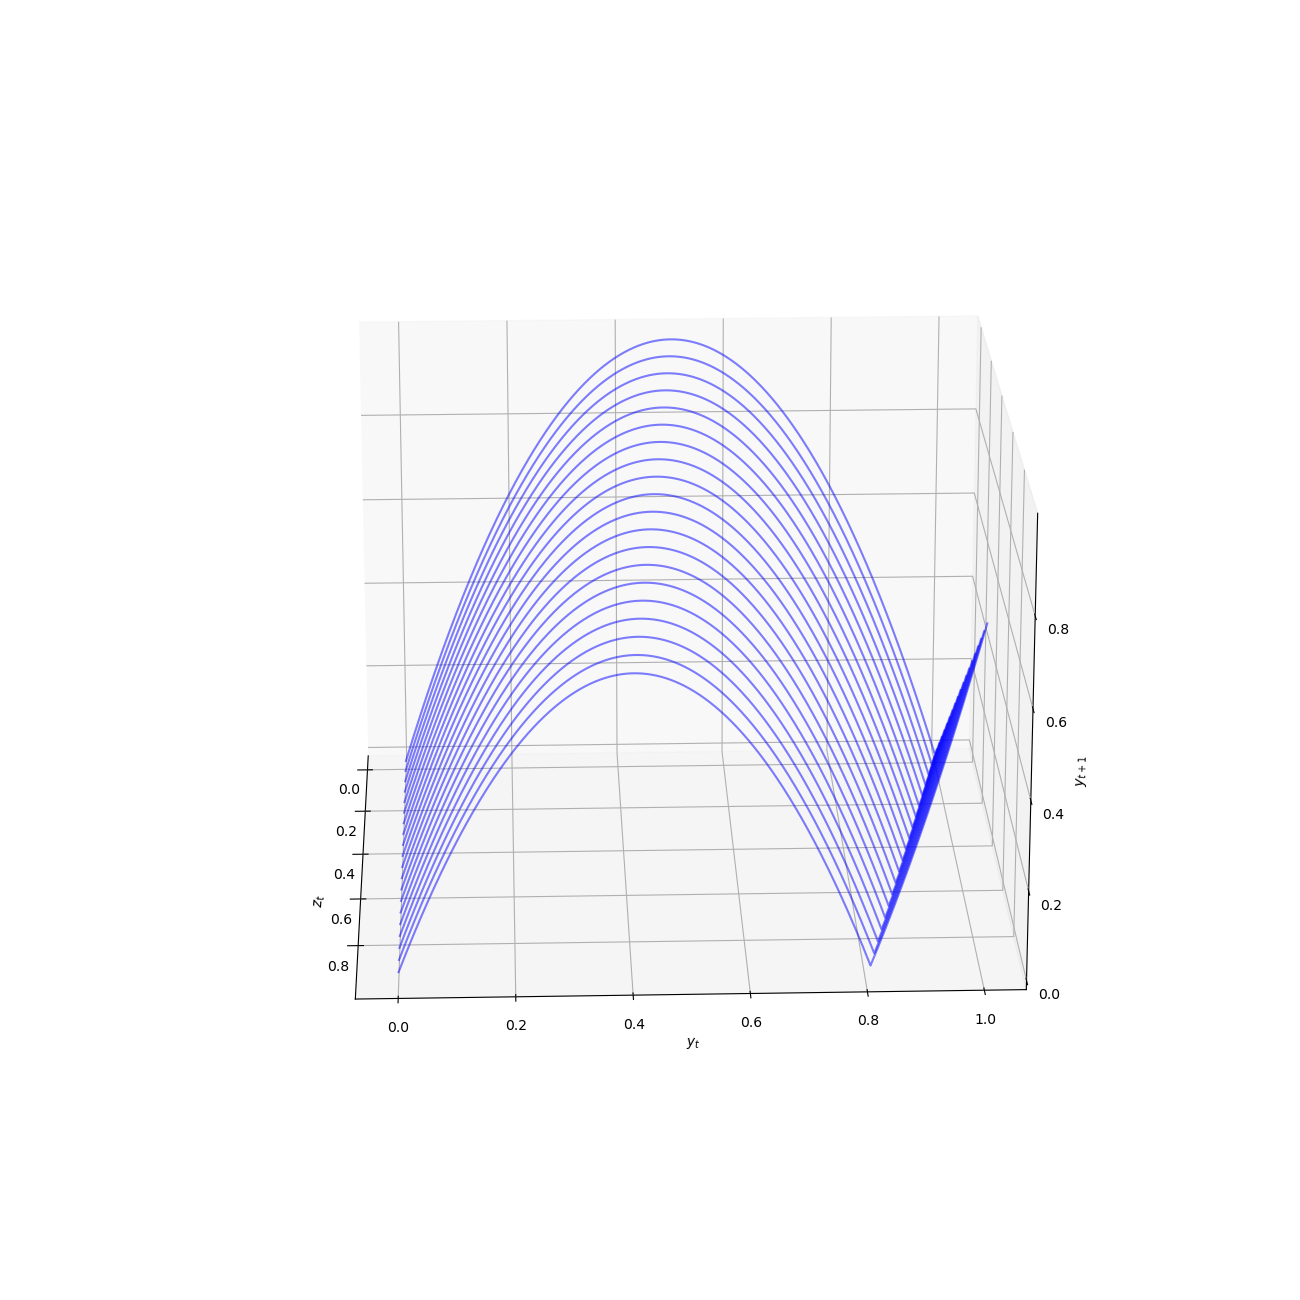

In [14]:
fig2 = plt.figure(figsize=(13, 13))
ax = plt.subplot(111, projection='3d')
_=[ax.plot(zs[i]*np.ones(len(y)), y, y_tp[:, i], 'b-', alpha=0.5) for i in range(0, len(zs), 1)]
ax.set_xlabel("$z_t$")
ax.set_ylabel("$y_t$")
ax.set_zlabel("$y_{t+1}$")

azims = np.arange(0, 720, 2)
for azim in azims:
    ax.view_init(elev=20., azim=azim)
    fig2.canvas.draw()
    time.sleep(0.001)

In [15]:
g(y, z).shape, f(z)

NameError: name 'z' is not defined

In [ ]:
g(g(y, z), f(z))

In [62]:
z

0.9

In [ ]:
f(z)

In [ ]:
y